# Dstl Satellite Imagery Feature Detection
 **Can you train an eye in the sky?**

Segmentacion semantica de imagenes satelitales


### Descripcion del proyecto:
1- Descripcion \\
2- porque he elegido este proyecto \\
3- recursos con los que cuento. \\
4- metodologia \\




<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/5916/media/6100-Frag_3.png' />

<font color='white'>'''</font>

<h4>Porqué este proyecto?</h4>

<font color='white'>''''''''</font>Escuchando un programa de radio hablando sobre el cambio climatico, mencionaron
en un momento dado que el gobierno britanico anunció que iba a hacer uso del espionaje climatico para asegurar que los paises firmantes de los acuerdos climatico cumplieran con los compromisos, ya que se recibian ayudas a cambio.\
La expresion de espionaje climatico me pareció curiosa, y la investigué un poco mas. Al parecer una [empresa](https://www.ghgsat.com/en/technology) canadiense estaba desarrollando un programa basado en deep learning, que reconocia la presencia de metano a partir de imagenes de satelite. Si bien no es la unica en trabajar en esta direccion.

<font color='white'>''''''''</font>Mi interés por el tratamiento de imagenes proviene de mi faceta artistica. Estudié bellas artes, y desarrollé toda mi obra artistica entorno a la creacion de patrones visuales en medios fisicos.

<font color='white'>''''''''</font>Por ultimo, este dataset de Kaggle suponia un reto importante para poner a prueba mis conocimientos de python, de tratamiento de datos visuales, y de deep learning, y ademas ver como me enfrentaba a un nuevo tipo de problemas.(tamaños grandes de datos..)
<font color='white'>'''</font>

<font color='white'>'''</font>
 <h4>Descripcion de los datos:</h4>

El organismo que publica este reto en Kaggle es DSTL o  '*The Defence Science and Technology Laboratory*' es una agencia ejecutiva gobernamental del reino unido dedicadas a la ciencia y la tecnologia en el area de defensa. 
El archivo principal proporcionado (comprimido en zip) contiene 6 archivos comprimidos:

* <h5>grid_sizes.csv.zip</h5>
* <h5>sample_submission.csv.zip</h5>
* <h5>sixteen_band.zip</h5>
* <h5>three_band.zip</h5>
* <h5>train_geojson_v3.zip</h5>
* <h5>train_wkt_v4.csv.zip</h5>


 <h3>El objetivo</h3>

El participante dispone de imagenes de satelite  que abarcan 1km * 1km en formato 3bandas y 16 bandas. El objetivo es clasificar los multiples tipos de  objetos presentes en las imagenes. <font color='white'>'''</font>

<h3>Imagenes:</h3>
Hay dos archivos de imagenes:

1. **three_band:** 
Guarda 450 imagenes en formato tiff de 3 canales (RGB) con resolucion 3359 * 3390 aproximadamente.
Entre ellas se encuentran las 25 imagenes anotadas para el entrenamiento.

1. **sixteen_band:** 
Aqui encontramos tres tipos de imagenes y hay 450 de cada tipo.

    * Imagenes multiespectrales:(sufijo '_M') 
    
    Compuestas por 8 bandas y  abarcan un espectro entre 400 y 1040 nanometros. Los colores (red, red edge, coastal, blue, green, yellow, near-IR1 and near-IR2) que la componenen se obtienen segmentando ese rango en 8 partes. e.g. el color rojo se situa en [630-690 nm]. Incluyen una parte de infrarrojos.
Tienen una resolucion de  837*839 aproximadamente. No todas las imagenes tienen el mismo tamaño. 
    * Imagenes Pancromaticas: (sufijo '_P) 
    
    Combinan las 3 bandas rojo verde y azul en una sola banda, teniendo mas resolucion en la luminosidad , aunque sacrificando la informacion de las bandas individuales de ahi que se ven en blanco y negro. Tiene una resolucion de(3340,3390)
    * Imagenes SWIR (short wavelength infrared): (sufijo '_A')

        Compuestas por 8 bandas comprendidas entre 1195 y 2365 nm con resolucion: 137 * 138 aproximadamente. Estas longitudes son utiles para detectar entre otros zonas con presencia de agua.

<h4>Conceptos a aclarar:</h4>

**Band o raster bands:**\
El termino band que aparece en multiples ocasiones se refiere al rango de longitud de onda.\
**Longitude de onda:**\
La luz se propaga en ondas electromagneticas. Una de sus caracteriticas es su longitud. Para el ojo humano por ejemplo, dos longitudes de onda diferentes se traducen en dos colores distintos (si nos situamos en el espectro visible).

**Espectro visible:**\
espectro visible es toda longitud de onda visible para el ojo. En el caso del ojo humano, se situa en [400-700 nm] aproximadamente.\
**Nanometros**\
medida metrica en la que se suelen medir las longirudes de onda.
es equivalente a  10−e9 metros.

<font color='white'>'''</font>
<h3>Poligonos</h3>

<h4>Como se reconocen los objetos?</h4>

La clasificacion se realiza usando unas imagenes anotadas. La anotacion es, en el contexto de la vision por computadora, un proceso que se realiza por humanos, en el que se trazan los contornos de los objetos en una imagen dada con una herramienta digital, y se les asocia con una categoria semantica que le describe. \
>Ejemplo:  
*Se dibujan los contornos de un arbol y se le anota el nombre 'arbol'. En el dataset encontramos 10 categorias (edificios, campo_plantado, vehiculo etc).*

Los contornos trazados, se llaman poligonos, son datos vectoriales, en los que se registran las coordenadas [x,y] de los puntos (no todos) que conforman el poligono en un espacio dado.

Las coordenadas originales de los poligonos son coordenadas GIS, situables en el mapa, aunque para no mostrar la localizacion real de los lugares los han trasladado a un espacio vectorial [0,1,0,1].\
Tenemos dos archivos dedicados a los poligonos, y se puede elegir cualquiera para llevar a cabo la tarea.

* train_wkt_v4.csv.zip: (WKT: Well-Known-Text)\
Cada fila de este csv (comprimido) contiene la informacion del poligono, con la categoria correspondiente, y el identificador de imagen.  

* train_geojson_v3.zip:\
geojson es un formato adaptado y mejorado (inspirado en json) para intercambiar datos geograficos en forma clave:valor. En este archivo la organizacion es distinta. Tiene 25 carpetas con nombre (identificador de la imagen), y dentro de cada carpeta hay multiples documentos geojson identificados con su categoria.
<font color='white'>'''</font>

<font color='white'>'''</font>

Como hemos mencionado anteriormente, las coordenadas de los poligonos estan trasladadas a un espacio vectorial de [0,1,0,1]. Este espacio vectorial representa una imagen de 1km*1km, sin embargo, para evitar abrir imagenes de tamaño grande, fueron recortadas siguiendo una rejilla en multiples partes.

Para poder escalar los poligonos al tamaño de su imagen correpondiente, nos facilitan una formula para hacerlo.

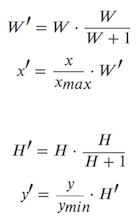

Donde Xmax e Ymin  son los las coordenadas de la imagen en la rejilla, y se encuentran en el archivo **grid_sizes.csv.zip**, W y H son el ancho y la altura de la imagen correspondiente.  <font color='white'>'''</font>

<font color='white'>'''</font>
Los resultados de las predicciones seran en formato WKT inscritos en el csv que facilitan: **sample_submission.csv** en forma Id_imagen, Clase/Categoria de ojeto, y Poligonos.
<font color='white'>'''</font>

####Importamos las librerias necesarias:

In [12]:
#
import warnings
#Instalamos las librerias necesarias para el desarrollo del cuaderno.
!pip install rasterio -q
!pip install geopandas -q
warnings.filterwarnings('ignore')
#importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from subprocess import check_output
import cv2
import gdal

import tifffile as tiff
import albumentations as A
import json
import os
import glob
import subprocess as subp
import geopandas as gpd
import shapely
import sys
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
from zipfile import ZipFile# no se import Path


     |████████████████████████████████| 19.3 MB 35.7 MB/s 
     |████████████████████████████████| 1.0 MB 9.0 MB/s 
     |████████████████████████████████| 6.3 MB 24.8 MB/s 
     |████████████████████████████████| 16.7 MB 348 kB/s 


# Creacion de mascaras

###proceso:

* cargar archivos: grid_sizes.csv 
* tamaño de las imagenes: para que los marcos de las mascaras se ajusten bien a las imagenes que representan, he creado un dataframe img_sizes iterando sobre las imagenes que tienen anotaciones, y  que tendrá como columnas el Id de la imagen, y una tupla de (ancho,altura) de cada imagen.
*


###Cargar los datos desde Kaggle

El tamaño de los archivos en total es 21 GB, 7 GB para las imagenes de 16bandas, y 13 GB para las de 3 bandas. Entre las dos ocupan el 99% del dataset.  estando comprimidos.Descomprimidos llegan a pesar mas de 50 GB. lo cual esta en el limite de los cuadernos de colab.

Hay que recordar que las imagenes anotadas para el entrnamiento son 25,  de un total de 450. Por lo que he tomado la decision de solo seleccionar unas pocas imagenes para hacer las prediciones. 
En el caso de las imagenes de 16 bandas estando divididas en tres partes A, P y M (explicadas anteriormente) contamos 450*3 = 1350 imagenes. guardaremos 10 para hacer las predicciones finales.

In [13]:
import json
data = {"username":"miladdnouiouatt","key":"5a876da98bd9d54e95b3cf27bd91ec2f"}
with open('kaggle.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False)

In [14]:

#cargar todos los datos de kaggle a colab dura entre 3 y 4 minutos
#! pip install kaggle
#!pip install --upgrade --force-reinstall --no-deps kaggle#hago esto para evitar un warning
#creamos nuevo directorio para los archivos
! mkdir ~/.kaggle 

#el archivo kaggle.json (una clave de kaggle para acceder a la descarga)se descarga desde la cuenta de kaggle: your profile>account>Create New API Token
#proporciono el mio en la carpeta entregada
! cp kaggle.json ~/.kaggle/ 
! chmod 600 ~/.kaggle/kaggle.json

#descargar los archivos
! kaggle competitions download dstl-satellite-imagery-feature-detection 

  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 5.28MB/s]
 63% 9.00M/14.2M [00:00<00:00, 14.6MB/s]
100% 14.2M/14.2M [00:00<00:00, 19.5MB/s]
 81% 9.00M/11.1M [00:00<00:00, 27.3MB/s]
100% 11.1M/11.1M [00:00<00:00, 31.1MB/s]
100% 12.9G/12.9G [02:43<00:00, 130MB/s]
100% 12.9G/12.9G [02:43<00:00, 84.7MB/s]
  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 2.12MB/s]
100% 7.29G/7.30G [01:29<00:00, 99.3MB/s]
100% 7.30G/7.30G [01:29<00:00, 87.2MB/s]


In [15]:
# rutas de los archivos:
sixteenband = '/content/sixteen_band.zip'
threeband = '/content/three_band.zip'
gjson = '/content/train_geojson_v3.zip'

In [16]:
np.random.seed(43)
rand_ = np.random.randint(100,300, size=10, dtype=int)

with ZipFile(gjson, 'r') as zip:
    #obtenemos ids de entrenamiento
    listId = np.array(sorted([i.split('/')[-2] for i in zip.namelist()]))
    listId = list(np.unique(listId)[0:-2])

with ZipFile(sixteenband, 'r') as zp:
    #obtenemos ids de img 16 band
    listId16 = [i.split('/')[-1].split('.')[0][0:-2] for i in zp.namelist()]

    #l = list(set(listId16[100:155]+listId))
    for item in listId:
        for x in ['A','M','P']:       
            zp.extract(f"sixteen_band/{item}_{x}.tif")
    #extraemos una muestra de 10 para hacer predicciones        
    lista_ad = [listId16[i] for i in rand_ if listId16[i] not in listId]
    for i in lista_ad:
        for y in ['A','M','P']:
            zp.extract(f"sixteen_band/{i}_{y}.tif")
with ZipFile(threeband, 'r') as zp:
    for item in listId:
        zp.extract(f"three_band/{item}.tif")
    for i in lista_ad:
        zp.extract(f"three_band/{i}.tif")

'''
en la siguiente celda eliminamos los archivos que no nos sirven,ya que ocupan demasiado, y solo saturan la memoria de colab: 'three_band.zip' y  'sixteen_band.zip'.

Eliminamos tambien 'train_wkt_v4.csv.zip' ya que es otra manera de almacenar los poligonos. Elegí los del formatos json para el proyecto. 

'''

In [17]:
! rm three_band.zip sixteen_band.zip train_wkt_v4.csv.zip kaggle.json

In [18]:
del zip

###Lectura de archivos

In [19]:
#csv donde se almacenan los tamaños de rejilla
grid_sizes = pd.read_csv( '/content/grid_sizes.csv.zip', index_col=0)  
grid_sizes.head(3)

,Xmax,Ymin
6120_2_4,0.009180,-0.00904
6120_2_3,0.009169,-0.00904
6120_2_2,0.009188,-0.00904


In [20]:
#Extraemos las carpetas de los poligonos en json 
with ZipFile('train_geojson_v3.zip', 'r') as zp:
    zp.extractall()
! rm train_geojson_v3.zip
! rm -r __MACOSX

In [21]:
# lista de identificadores de imagenes con poligonos
lista_id = (check_output(["ls", 'train_geojson_v3']).decode("utf8")).split(sep = '\n')[0:-1]
print(*lista_id[0:8], f'... hasta {len(lista_id)}', sep='  ')#algunos de los 25 ids

6010_1_2  6010_4_2  6010_4_4  6040_1_0  6040_1_3  6040_2_2  6040_4_4  6060_2_3  ... hasta 25


In [22]:
#diccionario de objetos y numero de clase (30 obj) proporcionado por DSTL
filename_to_classType = {'001_MM_L3_EXTRACTION_MINE':1,'001_MM_L2_LARGE_BUILDING':1,'001_MM_L3_RESIDENTIAL_BUILDING':1,'001_MM_L3_NON_RESIDENTIAL_BUILDING':1,
                         '001_MM_L5_MISC_SMALL_STRUCTURE':2,'002_TR_L3_GOOD_ROADS':3,'002_TR_L4_POOR_DIRT_CART_TRACK':4,'002_TR_L6_FOOTPATH_TRAIL':4,
                         '006_VEG_L2_WOODLAND':5,'006_VEG_L3_HEDGEROWS':5,'006_VEG_L5_GROUP_TREES':5,'006_VEG_L5_STANDALONE_TREES':5,'007_AGR_L2_CONTOUR_PLOUGHING_CROPLAND':6,
                         '007_AGR_L6_ROW_CROP':6,'006_VEG_L2_SCRUBLAND':6,'007_AGR_L2_DEMARCATED_NON_CROP_FIELD':7, '007_AGR_L7_FARM_ANIMALS_IN_FIELD':7,'008_WTR_L3_WATERWAY':7,
                         '008_WTR_L2_STANDING_WATER':8,'008_WTR_L3_DRY_RIVERBED':8,'003_VH_L4_LARGE_VEHICLE':9,'003_VH_L5_SMALL_VEHICLE':10,'003_VH_L6_MOTORBIKE':10,'003_VH_L4_AQUATIC_SMALL':10,
                         '005_VO_L6_MASTS_RADIO_TOWER':2,'004_UPI_L6_SATELLITE_DISHES_DISH_AERIAL':2,'004_UPI_L5_PYLONS':2,'007_AGR_L2_ORCHARD':6,'001_MM_L4_BRIDGE':2,'005_VO_L7_FLAGPOLE':2}

In [23]:
#contenido de una de las carpetas de poligonos
lis = (check_output(["ls", f'train_geojson_v3/{lista_id[0]}']).decode("utf8")).split(sep = '\n')#[0:-2]
print(*lis[0:3], sep='/  /')

001_MM_L5_MISC_SMALL_STRUCTURE.geojson/  /002_TR_L4_POOR_DIRT_CART_TRACK.geojson/  /002_TR_L6_FOOTPATH_TRAIL.geojson


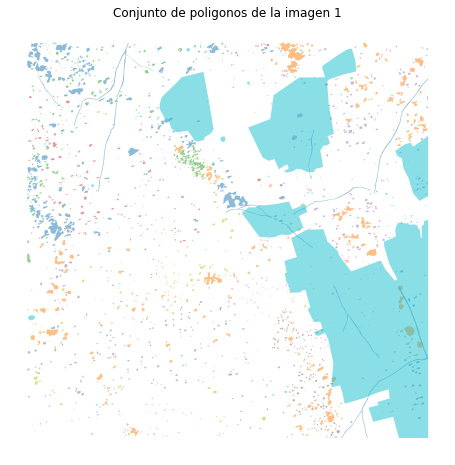

In [24]:
# mostramos un conjunto de poligonos
df1 = gpd.read_file(f'train_geojson_v3/{lista_id[0]}/{lis[0]}')
for i in range(1,6):
    ls = lis[1:-1]
    df2 = gpd.read_file(f'train_geojson_v3/{lista_id[0]}/{ls[i]}')
    df1 = df1.append(df2)
#leg =  [' '.join(lis[i].split('.')[0].split('_')[4:]) for i in range(len(lis)-2)]
fig, ax = plt.subplots(1, 1)
#fig.legend(leg)
fig.patch.set_visible(False) ;ax.axis('off')
plt.xticks([]); plt.yticks([]); fig.set_figheight(8); fig.set_figwidth(8)
plt.title('Conjunto de poligonos de la imagen 1')
df1.plot(ax=ax,alpha=0.5, cmap='tab10',legend = False);

Como podemos ver en esta salida, los nombres de los archivos de poligonos son la anotacion que indica el tipo de objeto que representa.\
La celda anterior:  *filename_to_classType*, es un diccionario que recoje 
las anotaciones de las imagenes (nombres de los archivos geojson) como claves, y su valor como numero de clase de objeto de 1 a 10.

En la descripcion de los datos que facilitan, solo mencionan la mitad de las anotaciones nombre:numero. He completado las anotaciones siguiendo la logica que siguieron ellos.


In [25]:
#extraemos los tamaños de  imagenes para el training
def img_sizes(lista_id,path):
    shp = []
    for id in lista_id:
        image = os.path.abspath(path + '/%s_M.tif'%id)
        read_img = tiff.imread(image)
        shp.append((read_img.shape[1],read_img.shape[2]))
    df_sz = list(zip(lista_id,shp))
    return pd.DataFrame(df_sz,columns=['ImageId','shp']).set_index('ImageId')
img_sizes = img_sizes(lista_id,'/content/sixteen_band')
img_sizes.head(3)

,shp
ImageId,
6010_1_2,"(837, 849)"
6010_4_2,"(837, 849)"
6010_4_4,"(837, 848)"


**Tamaño de las imagenes:** para que los marcos de las mascaras se ajusten bien a las imagenes que representan, he creado un dataframe img_sizes iterando sobre las imagenes que tienen anotaciones, y que tendrá como columnas el Id de la imagen, y una tupla de (ancho,altura) de cada imagen.

In [26]:
def scale_coords(shape, grid_name, point):

    '''Escalar las coordenadas de un poligono para ajustarlo al tamaño de la celda en la rejilla de imagenes'''
    h, w = shape
    Xmax, Ymin = grid_sizes.loc[grid_name][['Xmax', 'Ymin']]
    x,y = point[:,0], point[:,1]

    wp = float(w**2)/(w+1)
    xp = x/Xmax*wp

    hp = float(h**2)/(h+1)
    yp = y/Ymin*hp

    return np.concatenate([xp[:,None],yp[:,None]], axis=1)



Creamos un array con zeros de tamaño (ancho_imagen, Altura_imagen, 10 clases de profundidad) en el que insertaremos los poligonos. Los poligonos de la clase 1 iran en el array 0 y los de la clase 2 al array 1 etc.

Esta funcion itera sobre todos los archivos en geojson de una carpeta/imagen, escala los poligono al tamaño de la imagen, lo coloca en el array creado anteriormente, y rellena el interior de cada poligono con 1s.  


Al principio elegí la opcion convertir las mascaras a partir del formato WKT... al final opté por el formato geojson.




In [27]:
def convertir_mask(grid_name,shape):#,dic):
    '''
    Iterar en todas las carpetas por ID
    abrir los archivos en formato geojson
    Convertir los poligonos en arrays 
    escalar los arrays producidos a escala de la imagen
    '''
    
    arr = np.zeros((shape[0],shape[1],10))
    #iteramos sobre los archivos de la carpeta identificada con ID
    for filepath in glob.glob(os.path.join('train_geojson_v3',grid_name,'*.geojson')):
        
        #ignoramos  el archivo grid_sizes
        if filepath.split('/')[-1].startswith('Grid'):
            pass
        else:
            #abrimos el archivo con geopandas
            dfg = gpd.read_file(filepath)

            #lista donde almacenamos todos los poligonos del archivo
            '''el archivo puede contener tanto poligonos como multipoligonos.
            extraemos las geometrias y las convertimos a arrays.'''
            list_poly = []
            for idx in range(len(dfg.geometry)):
                # convertir a array los multipoligonos
                ls_gmt = dfg.geometry[idx]
                if  ls_gmt.type=='MultiPolygon':
                    for poly in list(ls_gmt):
                        list_poly.append(np.array(poly.exterior.coords))
                    
                    
                # convertir a array los poligonos    
                if  ls_gmt.type=='Polygon':
                    gmt = np.array(dfg.geometry[idx].exterior.coords)
                    list_poly.append(gmt)
            

            poly_scl=[]
            #escalamos los poligonos y ajustar los pixeles
            for shp in list_poly:
                geom = np.array(shp)
                gmt_scaled = scale_coords(shape, grid_name, geom)


                pts = gmt_scaled.astype(int)
                poly_scl.append(pts)
            # Create an empty mask and then fill in the polygons
            mask = np.zeros(shape)
            cv2.fillPoly(mask, poly_scl, 1)
            mask = mask.astype(int)
            #mask = np.where(mask>1,1,mask)
            #obtenemos el numero de clas
            cls_type = (filepath.split('/')[-1]).split('.')[0]
            cls_tp = filename_to_classType[cls_type]-1 #le quitamos 1, porque python empieza a contar con 0
            arr[:,:,cls_tp] += mask#introducimos la mascara en indice que le corresponde en la matriz
    arr = np.where(arr>1,1,arr)
    return arr

# Patches & Augmentation

La funcion cargar imagen, abre la imagen tiff como array, y transpone los ejes del array para facilitar la manipulacion de la misma.

In [28]:
#describir
def cargar_imagen(ruta_):
    '''Abrir la imagen tiff (multiespectrales), y ordenar las dimensiones para 
    alinearlas con las dimensiones de su mascara.
    '''
    img_tiff = gdal.Open(ruta_, gdal.GA_ReadOnly)
    img_tiff = img_tiff.ReadAsArray()
    img_tiff = img_tiff.transpose([1, 2, 0])
    return img_tiff

Los valor de los arrays de las imagenes tiff pueden estar en un rango mucho mayor que el que pueden tener jpeg o png. Hay valores de pixeles que pueden llegar de 0 hasta 16000. lo cual le confiere profundidad. sin embargo puede generar distorsiones marcadas.

Como se muestra en las imagenes a continuacion, la primera de ellas, a la izquierda se ve mucho mas oscura (siendo tomada de dia). Sin embargo podemos apreciar unos puntos muy claros desperdigados en la fotografia.

Estos puntos claros se llamarian 'outliers', que son unos pocos valores muy alejados de la media de los valores de la imagen, pero al mostrar la imagen, el programa trata todos los valores por igual lo que genera una imagen muy oscura.

Para solucionarlo, he optado por normalizar/escalar los valores de la imagen entre 0 y 2, y luego convertir todo valor mayor que 1 en 1.
Las dos imagenes de la derecha es depues de este proceso.

En la siguiente funcion , estudiar si la imagen necesita un ajuste o no. porque a lo mejor no todas las imagenes lo necesita. ver si puede depender de la amplitudo del rango de valores.

In [29]:
#describir como funciona
def ajustar_contraste(img, alpha =2,beta= 0):# el input es la imagen_tiff abieerta anteriormente
    norm = cv2.normalize(img, None, alpha=alpha, beta=beta, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    norm_img1 = np.clip(norm, 0, 1)# tiff en rango(0,1)
    return norm_img1

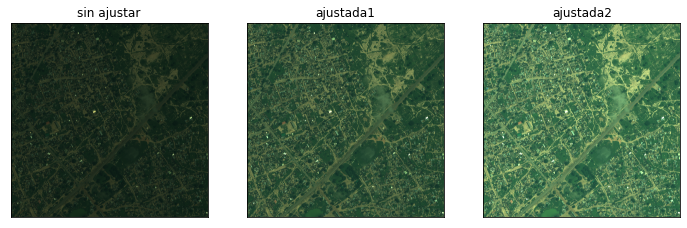

In [30]:
img_prb = cargar_imagen('/content/three_band/6100_1_3.tif')

titls = ['sin ajustar','ajustada1','ajustada2']
f, axarr = plt.subplots(1,3,figsize= (12,4))

for i in range(3):
    norm1 = ajustar_contraste(img_prb,alpha=0, beta=i+1)
    plt.sca(axarr[i]); plt.xticks([]) ;plt.yticks([])
    axarr[i].imshow(norm1);plt.title(titls[i])

El ajuste que le hemos aplicado a esta imagen en concreto es uno de los muchos que se le pueden realizar. tener en cuenta que estas imagenes pueden presentar todo tipo de problemas. niebla, nubes, sobreexposicion , polvo, las corrrecciones son infinitas. 

In [31]:
def recortar(img,msk,cantidad=50,size=128):
    seed = 123
    pch_img= extract_patches_2d(img, patch_size=(size, size), max_patches= cantidad, random_state=seed)
    pch_msk = extract_patches_2d(msk, patch_size=(size, size), max_patches= cantidad, random_state=seed)
    return (pch_img, pch_msk)

In [ ]:
#Crear Augmentations
'''def albmn(image,mask,size=128): 
    #crear 2 folder para guardar las aug       
    transform = A.Compose([
        A.RandomCrop(width=size, height=size),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2)])
    tr = transform(image = image, mask=mask)
    return tr'''

Albumentations es una libreria de

In [32]:
!mkdir train
!mkdir msk_org
!mkdir train/X_train
!mkdir train/y_train
#!mkdir train/X_val
#!mkdir train/y_val

In [ ]:
#! rm -r train/X_train train/y_train train/X_val train/y_val

In [35]:
#tener cuidado con los nombres de las carpetas. 
def recorte_2_dir(pth_img,msk,id):
    random.seed(42)
    rut = 'train'
    cargar_img = cargar_imagen(os.path.join(pth_img,id+'_M.tif'))#lista_id[id_img]
    tiff.imsave(f'msk_org/{id}.tif', msk) # esta linea es para guardar la mascara completa 
    ajust_img = ajustar_contraste(cargar_img,1.5)
    recort = recortar(ajust_img,msk,cantidad=50,size=128)#nos devuelve dos arrays: 1_recortesImg 2_recortesMask
    rand_ = np.random.randint(0,45,8) 
    for r in range(len(recort[0])):
            nom_x = f'train/X_train/{id}_{r}'
            nom_y = f'train/y_train/{id}_{r}'
            tiff.imsave(nom_x+'.tif', recort[0][r])
            tiff.imsave(nom_y+'.tif', recort[1][r])

In [36]:
def pipe():
    #lista_folder_split = ['X_train','y_train']
    pth_img = 'sixteen_band'
    rut = 'train'#ruta de todos los recortes,puede ser solamente content
    for id in lista_id:
        grid_sizes.loc[id]
        shape = img_sizes.loc[id][0]
        msk = convertir_mask(id,shape)
        recorte_2_dir(pth_img,msk,id)

pipe()

##parte a rehacer:

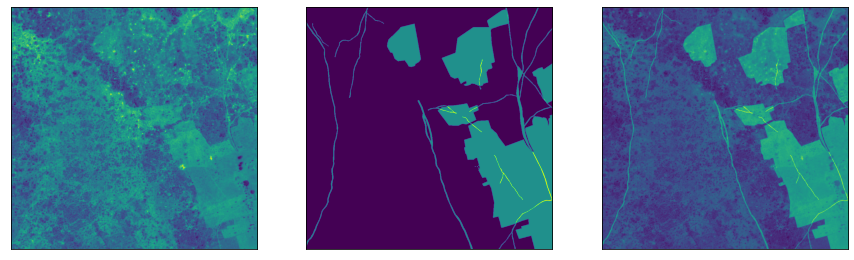

In [ ]:
from IPython.core.pylabtools import figsize
#en este caso: iterar en el dirctorio
tiff_fld_M = 'sixteen_band'; img_ejm = '6010_1_2_M.tif'
ruta_img = os.path.join(tiff_fld_M,img_ejm)
ruta_msk = os.path.join('msk_org','6010_1_2.tif')

img_tf = cargar_imagen(ruta_img)[:,:,1]
msk = tiff.imread(ruta_msk)
msk = msk[:,:,6]*60+msk[:,:,3]*60+msk[:,:,2]*60
mix = img_tf + msk

f, axarr = plt.subplots(1,3,figsize= (15,5))
list_p = [img_tf,msk,mix]
for i in range(3):
    plt.sca(axarr[i]); plt.xticks([]) ;plt.yticks([])
    axarr[i].imshow(list_p[i]);


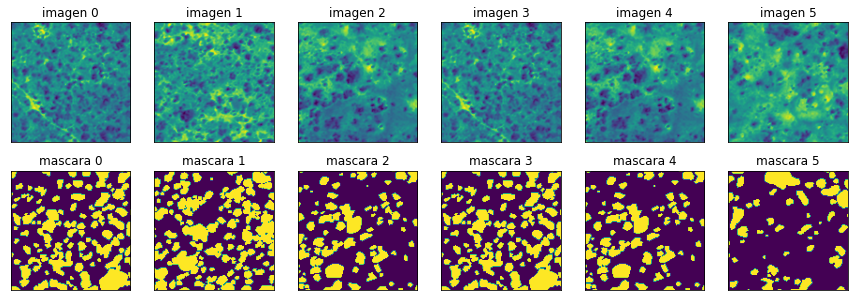

In [ ]:
# si ejecutamos la celda mas veces dara resultados distintos
#si el id no esta en train, probar con otro (estara en validation)
x = np.random.randint(10, size=6)
f, axarr = plt.subplots(2,6,figsize= (15,5))
id = '6010_4_4'#'6120_2_2'
ls_im = np.array([tiff.imread(f'train/X_train/{id}_{d}.tif') for d in x])
ls_msk = np.array([tiff.imread(f'train/y_train/{id}_{d}.tif') for d in x])
mx = ls_im,ls_msk

for i in range(6):
    for j in range(2):
        plt.sca(axarr[j][i]); plt.xticks([]) ;plt.yticks([])
        axarr[j,i].imshow(mx[j][i][:,:,4]+mx[j][i][:,:,3])
        if j==0:plt.title(f'imagen {i}')
        else:plt.title(f'mascara {i}')

##separar archivo entre train/test


## UNET:

In [ ]:
#https://colab.research.google.com/github/brainhack101/IntroDL/blob/master/notebooks/2019/Spitzer/tutorial_segmentation.ipynb#scrollTo=G_Q7597KTEbR
#https://www.kaggle.com/anomsulardi/dstl-semantic-segmentation

```
U-Net architecture for image segmentation

    Neural network for segmentation of large images should be memory-efficient, to enable training with large batch sizes
    U-Net is good choice for segmentation (Ronneberger, 2015)
        Fully-convolutional, allows tiled prediction of very large images
        Downsampling branch consisting of blocks of two convolutions and a pooling layer
        Upsampling branch consisting of an upsampling layer and two convolutions
        Skip connections copy activations from downsampling branchs and concatenate with upsampling branch

```
```


Choices for design of custom U-Net:

    How many blocks? How many convolutions per block? What filter size? Etc...
        Original U-net architecture is a good starting point, but might not be optimal
        Try different depths, filter sizes, etc.

Important: Use valid convolutions!
Valid convolution
	
Convolution with padding
Valid Convolution 	Convolution with padding
Figures from http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html

    Otherwise, predictions at the borders of the image patches are not correct. This is a problem, when doing tiled prediction of large images
    This results in a smaller output size than input size
    Groundtruth labels need to be cropped to the smaller output size when calculating performance metrics
```

src:Freiburg University \\



<figure>
<center>
<img src='https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png' />
<figcaption>Arquitectura de U_net   </figcaption></center>
</figure>

Esta arquitectura fue presentada por primera vez en el paper 'U-Net: Convolutional Networks for Biomedical Image Segmentation' que se encuentra en este link.

Arquitaectura U-net( ejemplo de 32x32pixeles en la resolucion mas baja).cada caja azul corresponde a un mapa de vectores-caracteristica (feature mapping). El numero de canales esta inscrito encima de cada caja. El tamaño ancho x altura se encuentra en parte inferior izquierda. las cajas blancas representan mapas de caracteristicas copiados. Las flechas muestran las diferentes operaciones.


#normalizamos imagenes:


In [37]:
!rm -r sixteen_band three_band msk_org sample_data

In [38]:
rut_ = 'train'
lx = os.listdir('train/X_train')
ly = os.listdir('train/y_train')

list_x = []
list_y= []
for i in range(len(lx)):
  list_x.append(tiff.imread(rut_+'/X_train/'+lx[i]))
  list_y.append(tiff.imread(rut_+'/y_train/'+ly[i]))

In [39]:
image_dataset = np.expand_dims(np.array(list_x),4)
mask_dataset = np.expand_dims(np.array(list_y),4)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(image_dataset,mask_dataset,test_size=0.2,random_state = 42)

In [43]:
del image_dataset
del mask_dataset

In [5]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function

#Model

In [44]:
#la definicion del modelo viene de este sitio
#https://github.com/bnsreenu/python_for_microscopists/blob/master/071-Malaria_cell_CNN_V5.0_for%20video.py'''
#https://www.kaggle.com/resolut/waterway-0-095-lb modelo de infrarojos/agua

def multiclass_unet_model():
    num_class = 10
    img_w =128 
    img_h=128 
    num_channels =8


    #Build the model
    inputs = tf.keras.layers.Input((img_h, img_w, num_channels))
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs) no voy a normalizar, ya viene hecho

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)#(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    
    #outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
    outputs = Conv2D(num_class, 1, 1, activation='sigmoid')(c9)#aqui es necesario darle el numero de clases como output.

    #Convolution2D
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
'''compilar el modelo con accuracy no dara resultados, ya que los datos estan desbalanceados,
utilizaremos en su lugar jacc_coef como metrica de compilacion. de ahi que habra que definir la funcion 
jacc_coef'''

In [3]:
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, EarlyStopping
'''
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=1e-4),
    ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
]'''

In [ ]:
model= multiclass_unet_model()
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[jacard_coef])

model.compile(optimizer = 'adam', loss = [jacard_coef_loss], metrics = [jacard_coef])

model.summary()

In [46]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(X_val, y_val), 
                    shuffle=False)

Epoch 1/10
63/63 [==============================] - 22s 158ms/step - loss: -0.1996 - jacard_coef: 0.2003 - val_loss: -0.2543 - val_jacard_coef: 0.2506
Epoch 2/10
63/63 [==============================] - 8s 119ms/step - loss: -0.2536 - jacard_coef: 0.2539 - val_loss: -0.2543 - val_jacard_coef: 0.2506
Epoch 3/10
63/63 [==============================] - 8s 120ms/step - loss: -0.2540 - jacard_coef: 0.2543 - val_loss: -0.2543 - val_jacard_coef: 0.2506
Epoch 4/10
63/63 [==============================] - 8s 119ms/step - loss: -0.2541 - jacard_coef: 0.2544 - val_loss: -0.2543 - val_jacard_coef: 0.2506
Epoch 5/10
63/63 [==============================] - 7s 118ms/step - loss: -0.2541 - jacard_coef: 0.2544 - val_loss: -0.2543 - val_jacard_coef: 0.2506
Epoch 6/10
63/63 [==============================] - 7s 118ms/step - loss: -0.2541 - jacard_coef: 0.2544 - val_loss: -0.2543 - val_jacard_coef: 0.2506
Epoch 7/10
63/63 [==============================] - 7s 119ms/step - loss: -0.2542 - jacard_coef: 0.

In [ ]:
# https://www.kaggle.com/hublebustler/building-cnn

En principio el funcionamiento del coeficiente de jaccard es simple. otra cosa es la implementacion.

recibe como argumentos la prediccion del algoritmo, en base a los x_test,
y efectua una comparacion de tipo interseccion de union IoU.

que tiene la formula siguiente: tp/(fp+tn+tp)

lo que no acabo de entender es si hay q iterar sobre cada imagen, cada clase o ambas.

para tener un poco mas claras las cosas: lo que recibimos de model.predict(x) es justamente las probabilidades de cada pixel de ser positivo o negativo.

realizamos un thresholding para generar la mascara y la pasamos por jcr_scr()
del que obtendremos un numero.

In [ ]:
print(history.history.keys())

plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()

sreeni tiene una aproximacion bastante bien ajustada al problema.
usa el coeficiente de jaccard como la loss function a reducir. 

Semantic segmentation evaluation

https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2

es necesario aplanar(flatten) las imagens predichas antes de aplicar el IoU, en caso contrario dara error 


In [ ]:
'''
# esta funcion es para seleccionar las mascaras con mas de 5% de 1
def msk_5_pct():
    rut = '/content/drive/MyDrive/proj_dstl'
    #lis_nm = []
    for msk in range(len(list_y)):
        for i in range(10):
            val, counts=np.unique(list_y[msk][:,:,i], return_counts=True)

            if (counts[0])< (16384-820):


                nomb = f'{ly[msk].split(".")[0]}_{i}'

                nom_x = f'{rut}/X_tr_sub/{nomb}'
                nom_y = f'{rut}/y_tr_sub/{nomb}'
                tiff.imsave(nom_x+'.tif', list_x[msk])
                cv2.imwrite(nom_y+'.png', list_y[msk][:,:,i])

                
msk_5_pct()'''